In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.spatial.distance import cdist

In [2]:
data = pd.read_csv('results.csv')
data

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31979,50.72,"Anderson, Steve K.",3414,124.02,M,32,211.75,35908,7500,NaN,...,9849,8.08,CA,148.65,26.13,104.78,99.55,USA,Larkspur,200.22
31980,61.28,"McCarthy, Michael P.",5212,165.02,M,34,302.52,35909,15459,NaN,...,27456,11.55,MA,203.43,31.07,135.85,128.37,USA,Norwell,285.47
31981,59.00,"Brimmer, Delia C.",5231,157.02,F,21,282.00,35910,10788,NaN,...,25092,10.77,CT,192.65,28.18,130.57,123.33,USA,West Simsbury,266.30
31982,63.75,"Morganthal, Amy",5800,167.82,F,38,302.73,35911,12009,NaN,...,27476,11.55,MA,207.52,30.98,137.03,129.90,USA,North Andover,285.87


In [3]:
data.columns

Index(['10k', 'name', 'division', '25k', 'gender', 'age', 'official', 'bib',
       'genderdiv', 'ctz', '35k', 'overall', 'pace', 'state', '30k', '5k',
       'half', '20k', 'country', 'city', '40k'],
      dtype='object')

Bib - race number determined by the qualifying race time

Name - the name of each runner

Age - age of the runner on the day of the race

M/F - gender of the runner

City - city where runner is from

State - state where runner is from (optional)

Country - country where runner is from

Citizen - country of citizenship (optional)

Unnamed - special category for runners who are visually or mobility impaired (optional)

5K, 10K, 15K, 20K, 25K, 30K, 35K, 40K - the elapsed time at each 5K split of the race

Half - elapsed time at the half way point

Pace - overall average pace of the race

Official Time - finishing time

Overall - overall ranking of all runners

Gender - ranking within the gender

Division - ranking within the age/gender division (for example: Female ages 30-34, Male ages 45-50, etc.)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [5]:
data.drop('ctz', axis=1, inplace=True)
data.replace(np.nan, 'unknown', inplace=True, regex=True)
data.replace('-', 0, inplace=True, regex=True)

In [6]:
boston = data[['age','gender','official','country']]

In [7]:
onehot = pd.get_dummies(boston['country'],drop_first=True)
boston.drop(columns='country', inplace=True)
boston=boston.join(onehot)  

boston.gender=boston.gender.astype('category').cat.codes
boston.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,age,gender,official,AUS,AUT,BAH,BAR,BEL,BER,BLR,...,TPE,TRI,TUR,UAE,UKR,URU,USA,VEN,VGB,ZIM
0,47,1,85.25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,33,0,138.95,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,41,1,80.60,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,24,0,140.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40,1,81.23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
ss = StandardScaler()
ss.fit_transform(boston)

array([[ 0.40586707,  0.90306096, -3.01622335, ..., -0.02438032,
        -0.00559166, -0.00559166],
       [-0.83128428, -1.10734495, -1.98944711, ..., -0.02438032,
        -0.00559166, -0.00559166],
       [-0.12434065,  0.90306096, -3.10513414, ..., -0.02438032,
        -0.00559166, -0.00559166],
       ...,
       [-1.89169973, -1.10734495,  0.74575476, ..., -0.02438032,
        -0.00559166, -0.00559166],
       [-0.38944451, -1.10734495,  1.14212481, ..., -0.02438032,
        -0.00559166, -0.00559166],
       [ 1.02444275,  0.90306096, -0.28102147, ..., -0.02438032,
        -0.00559166, -0.00559166]])

boston_scale = MinMaxScaler().fit_transform(boston)

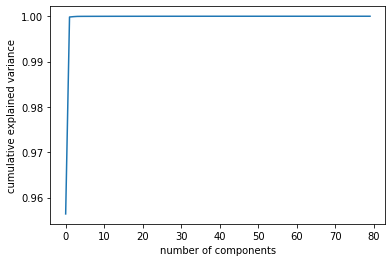

In [9]:
pca = PCA().fit(boston)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [10]:
pca = PCA(n_components = 10)

boston_pca = pca.fit_transform(boston) 

### Clustering

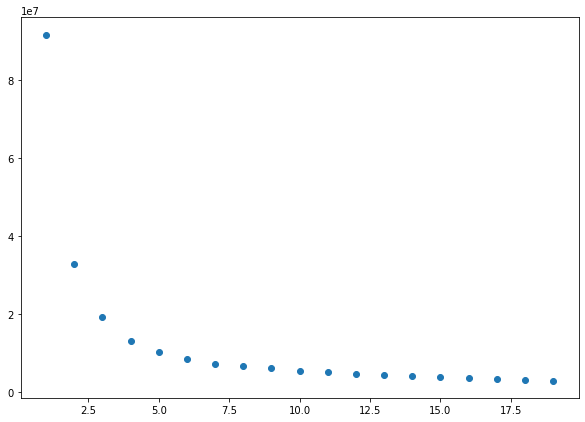

Text(3.1999999999999886, 0.5, 'Sum square variance')

In [11]:
var=[]
for k in range (1,20):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(boston_pca)
    #labels = kmeans.predict(boston)
    centroids = kmeans.cluster_centers_
    ssvariance = kmeans.inertia_
    var.append(ssvariance)
fig = plt.figure(1, figsize=(10,7))
ax = fig.add_subplot(111)
num_k=range(1,20)
plt.scatter(num_k,var)
plt.show()
ax.set_title('Optimum elbow method for selecting # of cluster')
ax.set_xlabel('# cluster')
ax.set_ylabel('Sum square variance')

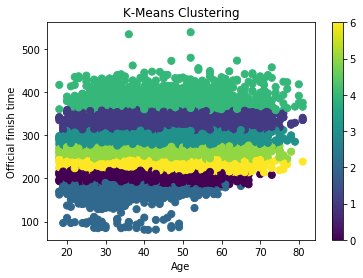

In [75]:
kmeans=KMeans(n_clusters=7,algorithm='elkan', max_iter=100)
kmeans.fit(boston_pca)
labels = kmeans.predict(boston_pca)
centers = kmeans.cluster_centers_
ssvariance = kmeans.inertia_
kmean_plot=pd.DataFrame(labels)
data['kmeans']=kmean_plot
## plotting the clusters obtained using k mean
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data.age,boston.official,
                     c=kmean_plot[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Official finish time')
plt.colorbar(scatter)

In [76]:
#Calculate the average of silhouette scores
silhouette_avg = metrics.silhouette_score(boston,labels)

In [77]:
print(silhouette_avg)

0.35699927869818826


### Visualization of clustering

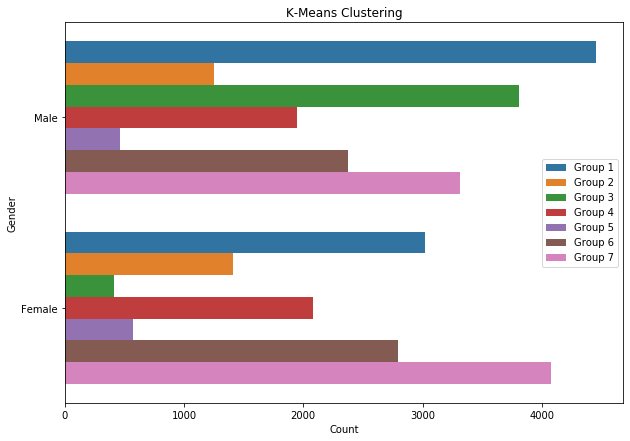

In [78]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='gender', hue='kmeans', data=data)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Count')
lab=['Male', 'Female']
ax.set_yticklabels(lab)
ax.set_ylabel('Gender')
# Set the legend
L = plt.legend()
for i in range (0,7):
    L.get_texts()[i].set_text('Group '+str(i+1))

In [79]:
#add columns for age div
age_group = lambda x: 0 if (x>18 and x<25) else(1 if (x>26 and x<40) else 2)
data['age_group'] = data.age.apply(age_group)
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,5k,half,20k,country,city,40k,kmeans,age_group,finish_group,kproto
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,...,8.02,39.72,37.65,JPN,Fukuoka,80.43,2,2,0,6
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,...,16.22,69.47,65.83,KEN,Eldoret,132.10,2,1,0,6
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,...,7.75,38.03,36.10,RSA,Paarl,76.10,2,2,0,6
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,...,16.20,69.47,65.83,ETH,Shoa,132.95,2,0,0,6
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,...,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,2,2,0,6


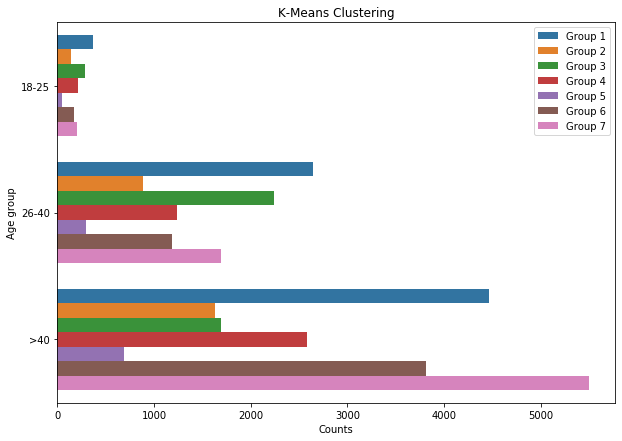

In [80]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='age_group', hue='kmeans', data=data)
ax.set_title('K-Means Clustering')
ax.set_ylabel('Age group')
ax.set_xlabel('Counts')

lab=['18-25', '26-40', '>40']
ax.set_yticklabels(lab)
# Set the legend
L = plt.legend()
for i in range (0,7):
    L.get_texts()[i].set_text('Group '+str(i+1))

### Run Times (5k, 10k, 20k, half, 25k, 30k, 35k, 40k, official)

In [81]:
# Need all of our time columns to be numeric not objects
dist_col = ['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official']
for column in dist_col:
    data[column] = data[column].astype(float)

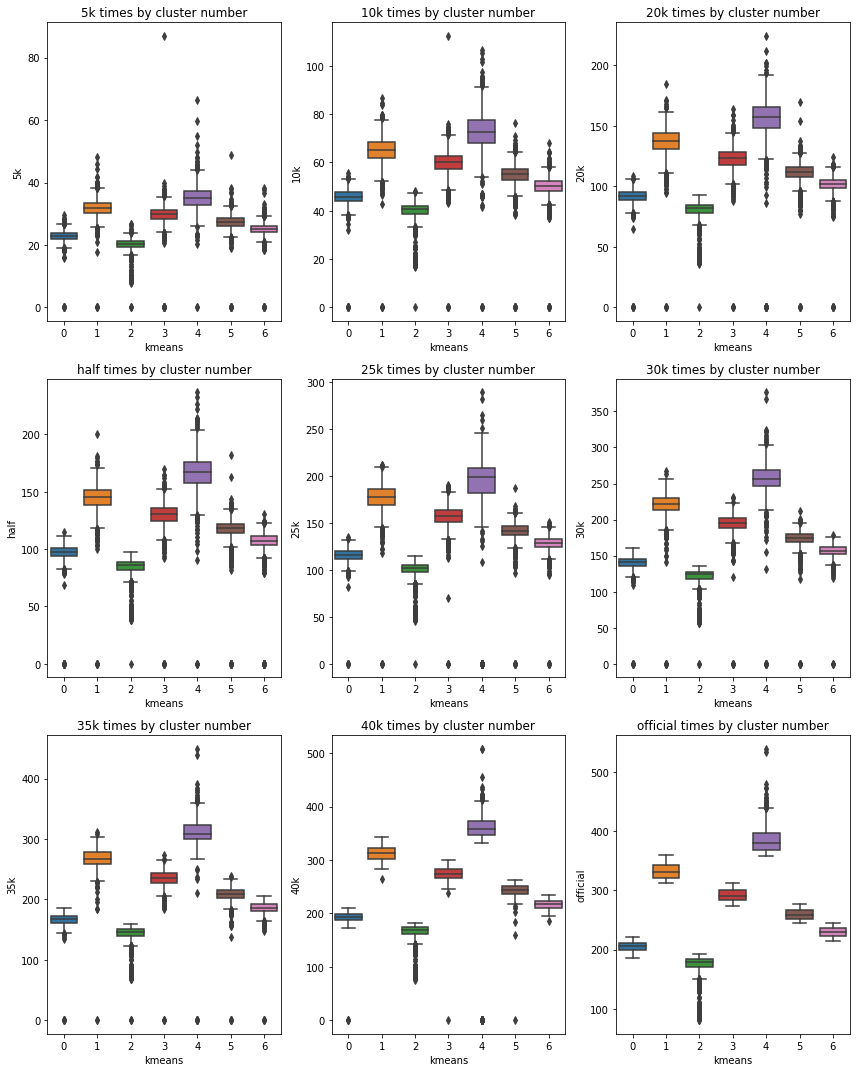

In [82]:
plt.figure(figsize=(12, 15))

for dist in dist_col:
    plt.subplot(3, 3, dist_col.index(dist)+1)
    sns.boxplot(x='kmeans', y=dist, data=data)
    plt.title('{} times by cluster number'.format(dist))
    
plt.tight_layout()
plt.show()

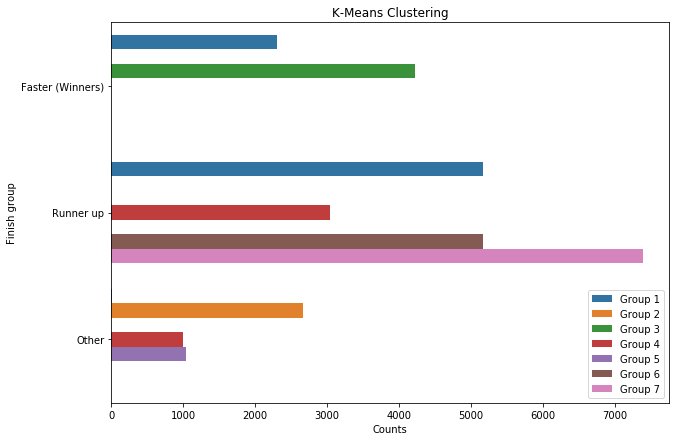

In [83]:
#add columns for age div
finish_group = lambda x: 0 if (x>60 and x<200) else(1 if (x>200 and x<300) else 2)
data['finish_group'] = data.official.apply(finish_group)
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='finish_group', hue='kmeans', data=data)
ax.set_title('K-Means Clustering')
ax.set_ylabel('Finish group')
ax.set_xlabel('Counts')

lab=['Faster (Winners)', 'Runner up', 'Other']
ax.set_yticklabels(lab)
# Set the legend
L = plt.legend()
for i in range (0,7):
    L.get_texts()[i].set_text('Group '+str(i+1))

In [84]:
check=data[['kmeans','official']]
for k in range(0,7):
    dt=check.loc[check.kmeans==k]
    print('Mean time of group %5i : %12.5f'%(k+1,dt.official.mean()))

Mean time of group     1 :    204.89125
Mean time of group     2 :    331.86899
Mean time of group     3 :    175.69245
Mean time of group     4 :    291.78354
Mean time of group     5 :    385.12230
Mean time of group     6 :    259.13178
Mean time of group     7 :    230.22639


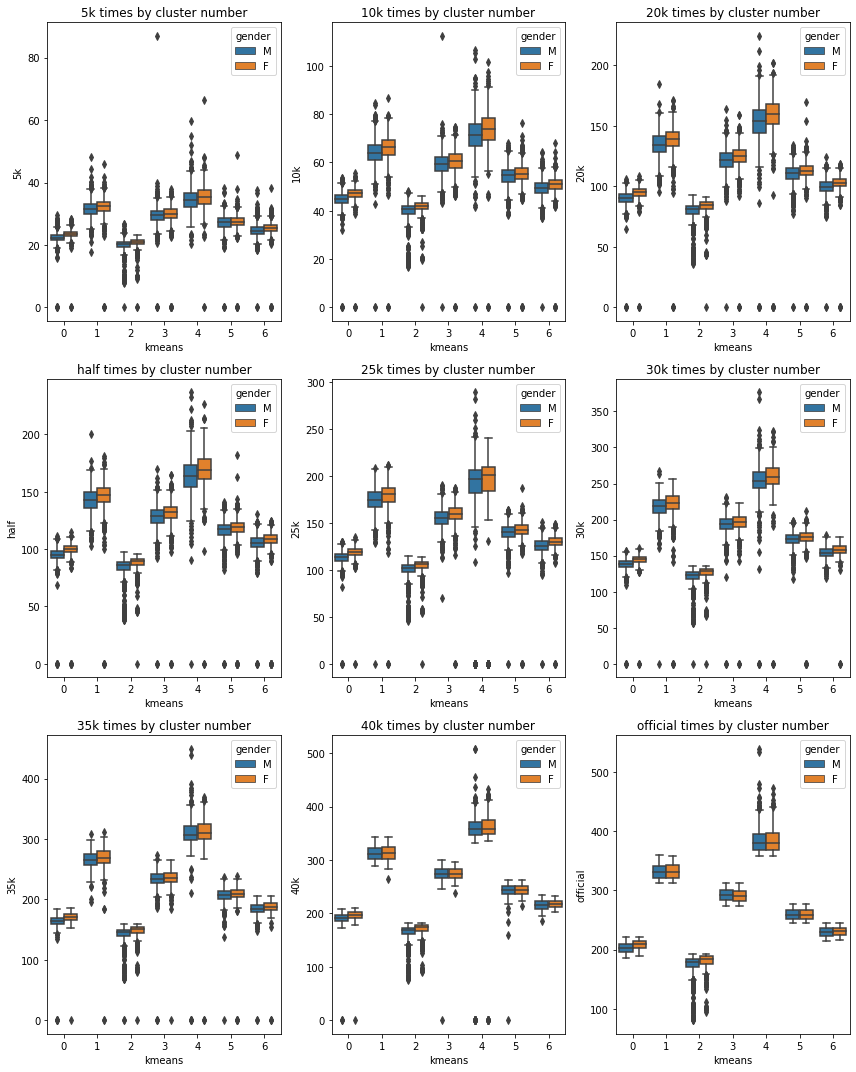

In [85]:
plt.figure(figsize=(12, 15))

for dist in dist_col:
    plt.subplot(3, 3, dist_col.index(dist)+1)
    sns.boxplot(x='kmeans', y=dist, hue='gender', data=data)
    plt.title('{} times by cluster number'.format(dist))
    
plt.tight_layout()
plt.show()

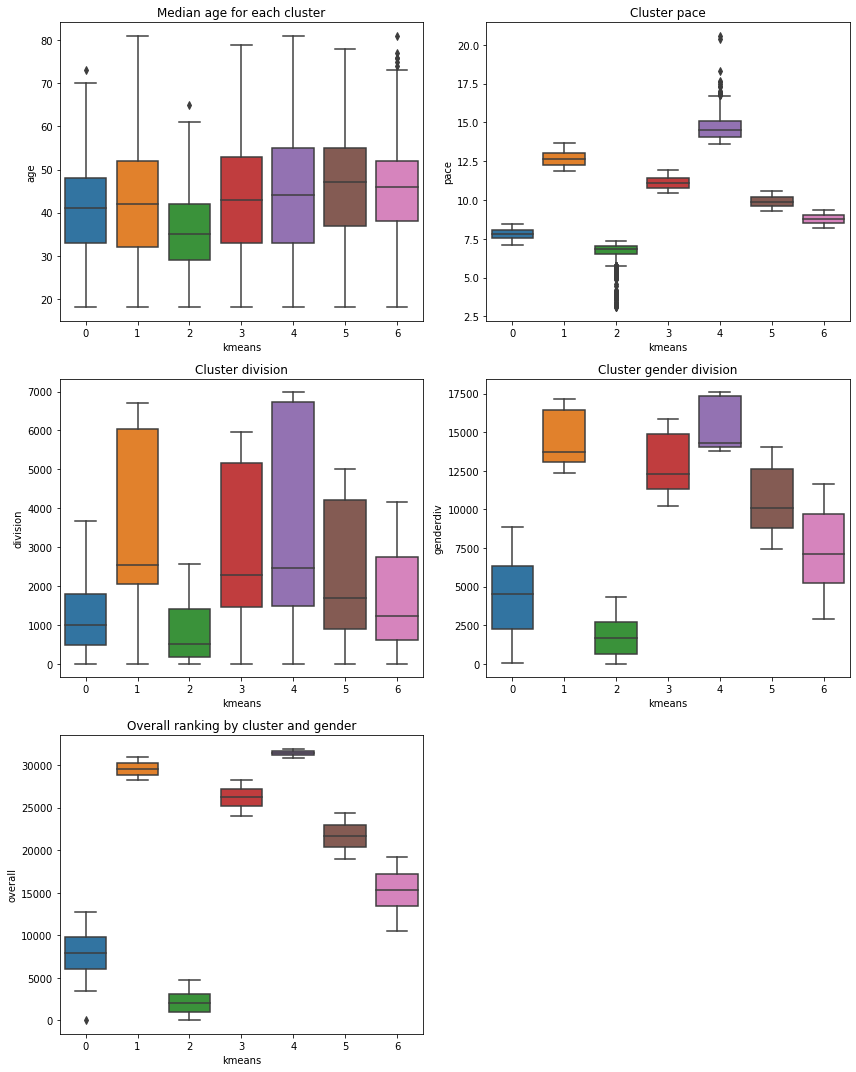

In [86]:
plt.figure(figsize=(12, 15))

plt.subplot(3, 2, 1)
sns.boxplot(x='kmeans', y='age', data=data)
plt.title('Median age for each cluster')

plt.subplot(3, 2, 2)
sns.boxplot(x='kmeans', y='pace', data=data)
plt.title('Cluster pace')

plt.subplot(3, 2, 3)
sns.boxplot(x='kmeans', y='division', data=data)
plt.title('Cluster division')

plt.subplot(3, 2, 4)
sns.boxplot(x='kmeans', y='genderdiv', data=data)
plt.title('Cluster gender division')

plt.subplot(3, 2, 5)
sns.boxplot(x='kmeans', y='overall', data=data)
plt.title('Overall ranking by cluster and gender')

plt.tight_layout()
plt.show()

# Kprototypes

In [87]:
boston_1 = data[['age','gender','official','country']]

scaler=LabelEncoder()
boston_1["gender"]=scaler.fit_transform(boston_1["gender"])
boston_1["country"]=scaler.fit_transform(boston_1["country"])
boston_1.head(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,age,gender,official,country
0,47,1,85.25,41
1,33,0,138.95,42
2,41,1,80.60,59
3,24,0,140.58,26
4,40,1,81.23,41


In [25]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=7) 
y_kprototypes = kproto.fit_predict(boston_1, categorical=[1,3])
labels=kproto.labels_
silScoreKproto=metrics.silhouette_score(boston_1,labels,metric="euclidean")
print("Silhouette Score with number : ",silScoreKproto)

Silhouette Score with number :  0.25729508920238636


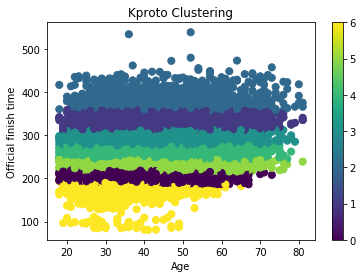

In [38]:
kproto_plot=pd.DataFrame(labels)
data['kproto']=kproto_plot
## plotting the clusters obtained using k mean
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data.age,boston.official,
                     c=kproto_plot[0],s=50)
ax.set_title('Kproto Clustering')
ax.set_xlabel('Age')
ax.set_ylabel('Official finish time')
plt.colorbar(scatter)

### Visualization of clustering

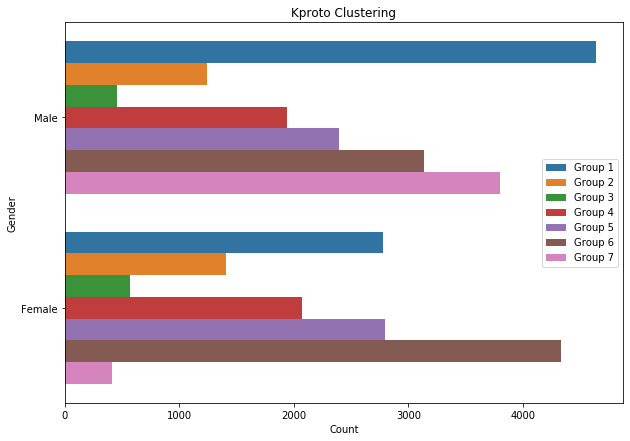

In [39]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='gender', hue='kproto', data=data)
ax.set_title('Kproto Clustering')
ax.set_xlabel('Count')
lab=['Male', 'Female']
ax.set_yticklabels(lab)
ax.set_ylabel('Gender')
# Set the legend
L = plt.legend()
for i in range (0,7):
    L.get_texts()[i].set_text('Group '+str(i+1))

In [40]:
#add columns for age div
age_group = lambda x: 0 if (x>18 and x<25) else(1 if (x>26 and x<40) else 2)
data['age_group'] = data.age.apply(age_group)
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,...,5k,half,20k,country,city,40k,kmeans,age_group,finish_group,kproto
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,...,8.02,39.72,37.65,JPN,Fukuoka,80.43,6,2,0,6
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,...,16.22,69.47,65.83,KEN,Eldoret,132.10,6,1,0,6
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,...,7.75,38.03,36.10,RSA,Paarl,76.10,6,2,0,6
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,...,16.20,69.47,65.83,ETH,Shoa,132.95,6,0,0,6
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,...,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,6,2,0,6


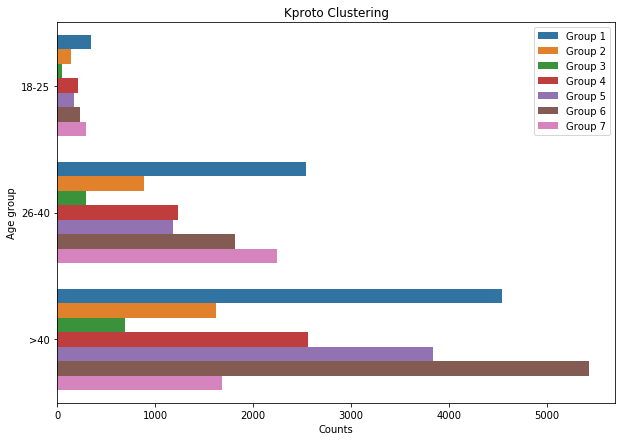

In [41]:
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='age_group', hue='kproto', data=data)
ax.set_title('Kproto Clustering')
ax.set_ylabel('Age group')
ax.set_xlabel('Counts')

lab=['18-25', '26-40', '>40']
ax.set_yticklabels(lab)
# Set the legend
L = plt.legend()
for i in range (0,7):
    L.get_texts()[i].set_text('Group '+str(i+1))

### Run Times (5k, 10k, 20k, half, 25k, 30k, 35k, 40k, official)

In [42]:
# Need all of our time columns to be numeric not objects
dist_col = ['5k', '10k', '20k', 'half', '25k', '30k', '35k', '40k', 'official']
for column in dist_col:
    data[column] = data[column].astype(float)

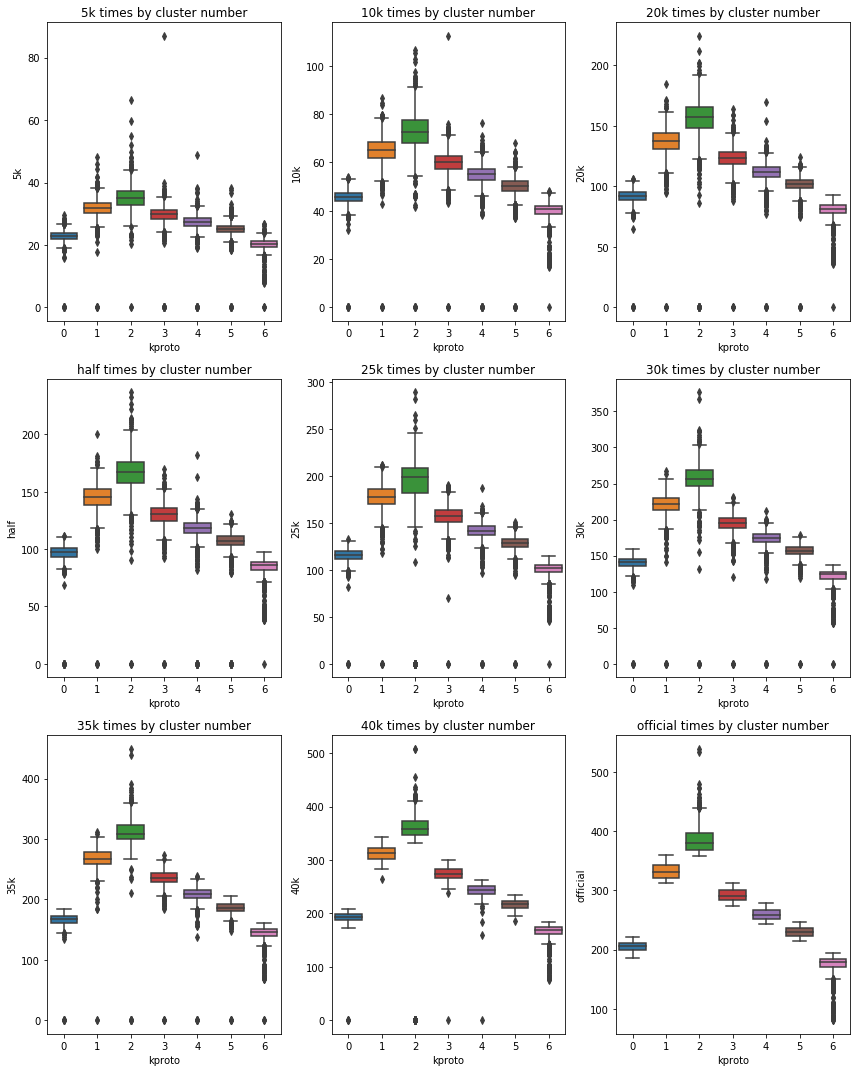

In [43]:
plt.figure(figsize=(12, 15))

for dist in dist_col:
    plt.subplot(3, 3, dist_col.index(dist)+1)
    sns.boxplot(x='kproto', y=dist, data=data)
    plt.title('{} times by cluster number'.format(dist))
    
plt.tight_layout()
plt.show()

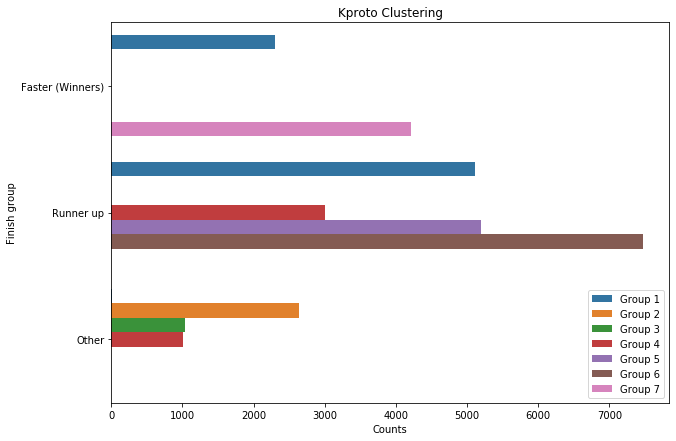

In [44]:
#add columns for age div
finish_group = lambda x: 0 if (x>60 and x<200) else(1 if (x>200 and x<300) else 2)
data['finish_group'] = data.official.apply(finish_group)
fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y='finish_group', hue='kproto', data=data)
ax.set_title('Kproto Clustering')
ax.set_ylabel('Finish group')
ax.set_xlabel('Counts')

lab=['Faster (Winners)', 'Runner up', 'Other']
ax.set_yticklabels(lab)
# Set the legend
L = plt.legend()
for i in range (0,7):
    L.get_texts()[i].set_text('Group '+str(i+1))

In [46]:
check=data[['kproto','official']]
for k in range(0,7):
    dt=check.loc[check.kproto==k]
    print('Mean time of group %5i : %12.5f'%(k+1,dt.official.mean()))

Mean time of group     1 :    204.72901
Mean time of group     2 :    332.00800
Mean time of group     3 :    385.14749
Mean time of group     4 :    292.01656
Mean time of group     5 :    259.29330
Mean time of group     6 :    230.19690
Mean time of group     7 :    175.68647


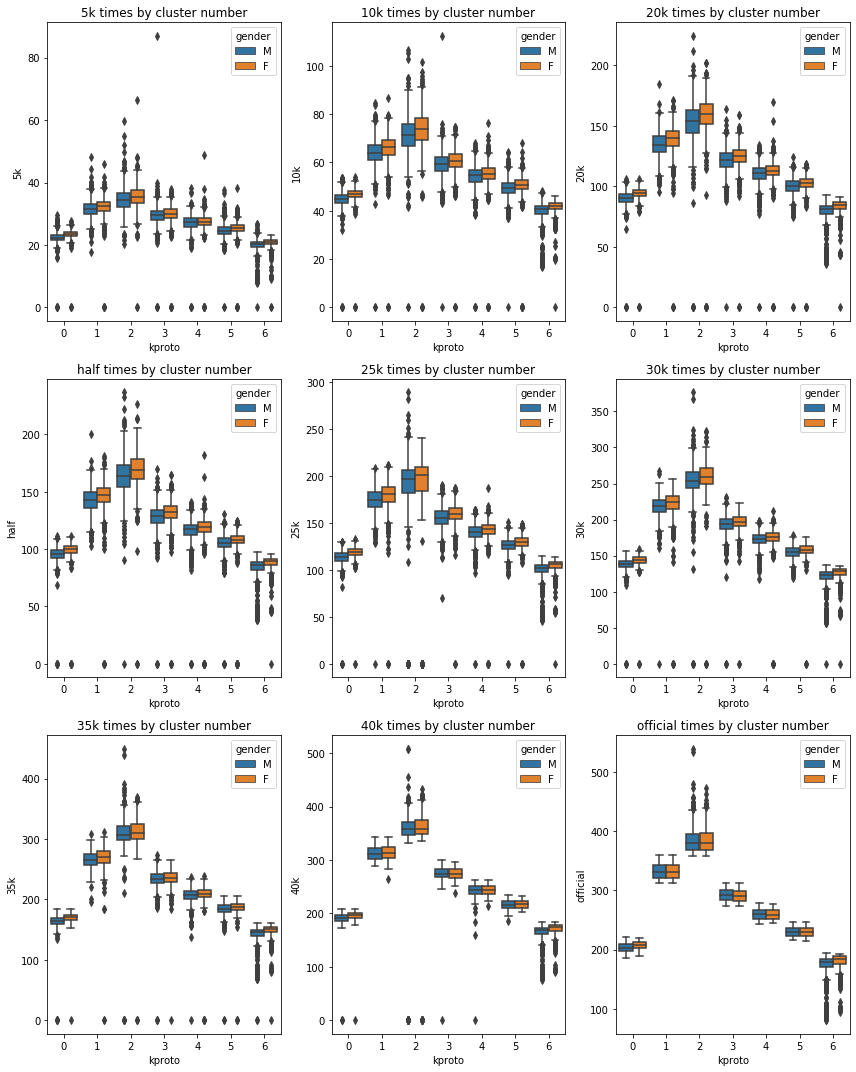

In [47]:
plt.figure(figsize=(12, 15))

for dist in dist_col:
    plt.subplot(3, 3, dist_col.index(dist)+1)
    sns.boxplot(x='kproto', y=dist, hue='gender', data=data)
    plt.title('{} times by cluster number'.format(dist))
    
plt.tight_layout()
plt.show()

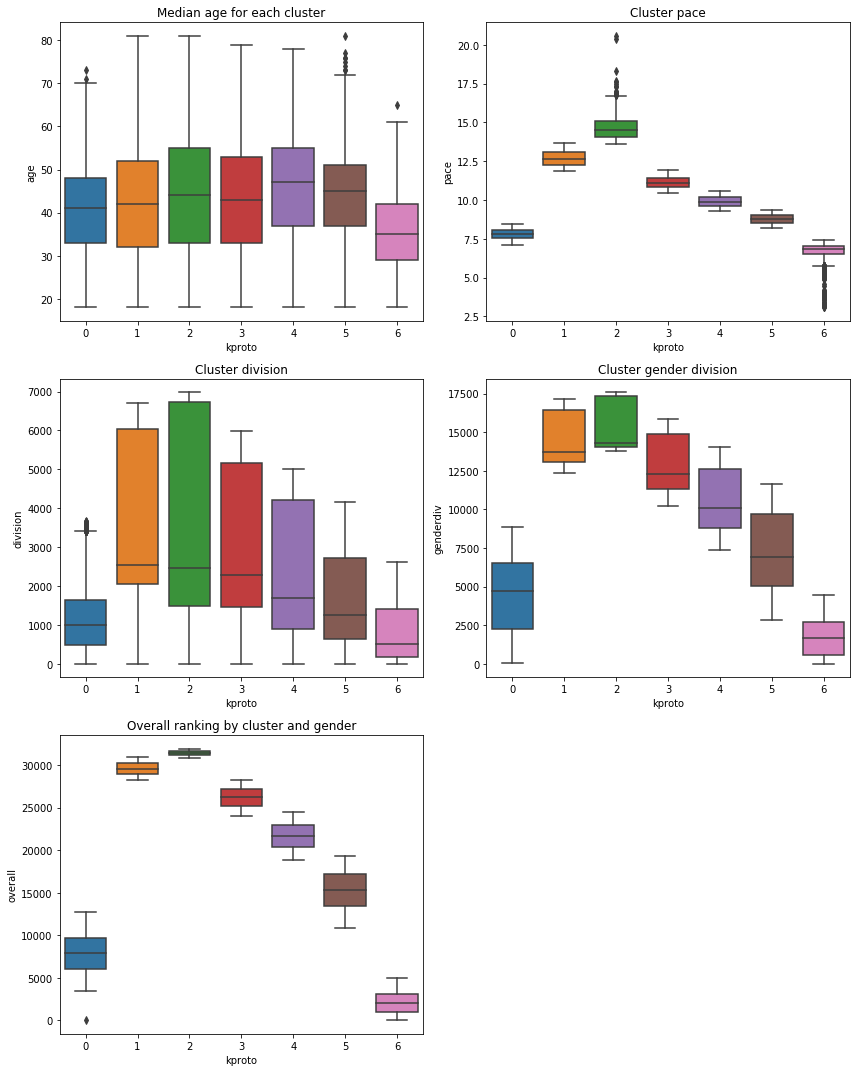

In [48]:
plt.figure(figsize=(12, 15))

plt.subplot(3, 2, 1)
sns.boxplot(x='kproto', y='age', data=data)
plt.title('Median age for each cluster')

plt.subplot(3, 2, 2)
sns.boxplot(x='kproto', y='pace', data=data)
plt.title('Cluster pace')

plt.subplot(3, 2, 3)
sns.boxplot(x='kproto', y='division', data=data)
plt.title('Cluster division')

plt.subplot(3, 2, 4)
sns.boxplot(x='kproto', y='genderdiv', data=data)
plt.title('Cluster gender division')

plt.subplot(3, 2, 5)
sns.boxplot(x='kproto', y='overall', data=data)
plt.title('Overall ranking by cluster and gender')

plt.tight_layout()
plt.show()